In [1]:
import pandas as pd
df = pd.read_csv("car_prices.csv")
df.head()

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928
3,A004,108694,12454
4,A005,124879,6634


In [15]:
import numpy as np

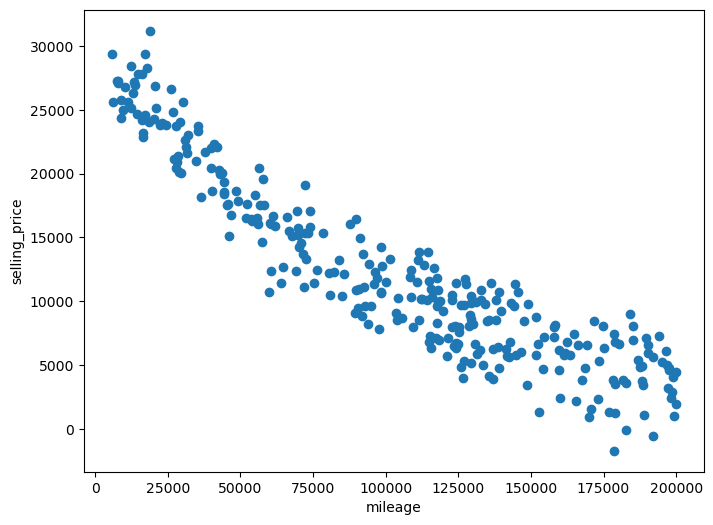

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["mileage"],df["selling_price"])
plt.xlabel("mileage")
plt.ylabel("selling_price")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=5)

In [11]:
df.shape, X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 3), (300, 1), (300,), (240, 1), (60, 1), (240,), (60,))

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(np.array([[1],[2],[3],[4]]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [21]:
# degree is determined by trial and error
poly = PolynomialFeatures(degree=3) # you can adjust the degree based on model performance
poly.fit_transform(np.array([[1],[2],[3],[4]]))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [25]:
poly = PolynomialFeatures(degree=2)
# when given degree = 1 , it is 85%
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [27]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [29]:
X_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mse,r2

(3942449.0425903373, 0.9161450769964844)

In [35]:
x_range = np.linspace(X["mileage"].min(), X["mileage"].max(), 300)

In [39]:
x_range.shape

(300,)

In [43]:
x_range.reshape(-1,1)
x_range[:5]

array([5769.        , 6417.95317726, 7066.90635452, 7715.85953177,
       8364.81270903])

In [45]:
x_range = np.linspace(X["mileage"].min(), X["mileage"].max(), 300).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


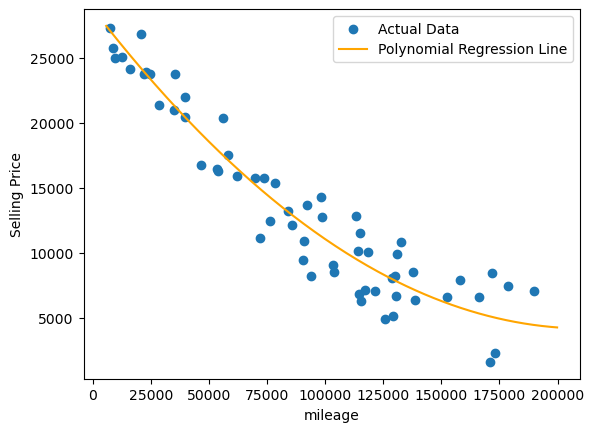

In [47]:
plt.scatter(X_test["mileage"], y_test, label="Actual Data")
plt.plot(x_range, y_range_pred, color="orange", label="Polynomial Regression Line")
plt.xlabel("mileage")
plt.ylabel("Selling Price")
plt.legend()
plt.show()